In [114]:
import pandas as pd
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

# Data Import, Cleanup and Splitting

In [84]:
# Read in Data and create new Dataframe
data = pd.read_csv('./data/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [85]:
# Verify types to ensure no data is missing or formatted incorrectly
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [94]:
# Create the feature set and target set.
x = data.drop('target', axis=1).copy()
y = data['target'].copy()
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [98]:
# Verify the Data Types to ensure we have Floats or Categories
x.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

We want the data cleaned so that our Decision Tree is less likely to incorrectly group attributes such as Chest Pain (cp). The Upgraded Data Dictionary showing which Type each column should be is as follows:
* 3 (age) - Age of Patient in Years - _***Float***_
* 4 (sex) - Integer of Patient Sex - _***Category***_
    * 1 = male
    * 2 = female
* 9 (cp) - Reported Chest Pain Type - _***Category***_
    * 1 = typical angina
    * 2 = atypical angina
    * 3 = non-anginal pain
    * 4 = asymptomatic
* 10 (trestbps) - Resting Blood Pressure - _***Float***_
* 12 (chol) - Cholestoral in mg/dl (Milligrams per Decilitre) - _***Float***_
* 16 (fbs) - Fasting Blood Sugar > 120 mg/dl - _***Float***_
* 19 (restecg) - Resting Electrocardiographic Results - _***Category***_
    * 0 = normal
    * 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2 = showing probable or definite left ventricular hypertrophy
* 32 (thalach) - Maximum Heart rate Achieved - _***Float***_
* 38 (exang) - Excercise Induced Angina (Chest Discomfort due to lack of Blood Flow, in this cae induced by exercise) - _***Float***_
* 40 (oldpeak) - ST depression induced by exercise relative to rest - _***Float***_
* 41 (slope) - Slope of the peak exercise ST segment - _***Category***_
    * 1 = upsloping
    * 2 = flat
    * 3 = downsloping
* 44 (ca) - Number of Major Vessels (0-3) colored by [flourosopy](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/fluoroscopy-procedure#:~:text=Fluoroscopy%20is%20a%20study%20of,can%20be%20seen%20in%20detail.) - _***Float***_
* 51 (thal) - _***Category***_
    * 3 = normal
    * 6 = fixed defect
    * 7 = reversable defect
* 58 (num) - The predicted Attribute

Since we have some attributes that are supposed to be non-continous data (Category Labeled), we need to separate them out.

In [100]:
# One-Hot Encode the X data so that the Category data is split into non-continous data
X_Encoded = pd.get_dummies(data=x, columns=['cp', 'restecg', 'slope', 'thal'])
X_Encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,...,0,1,0,0,1,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,1,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,2,1,...,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,1,...,0,1,0,0,1,0,0,0,0,1


# Machine Learning Model 1: Logistic Regression

In [121]:
# Separate the Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y, random_state=1)

# Create Scaler for data standardization
scaler = StandardScaler().fit(X_train)

# Normalization of the Train and Test Data
x_train_scaled = scaler.transform(X_train)
x_test_scaled =  scaler.transform(X_test)

# Create Classifier for Logistic Regression Model
LR_classifier = LogisticRegression(solver='lbfgs', max_iter=2000)
LR_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [122]:
# Score the model
print(f"Training Data Score: {LR_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {LR_classifier.score(X_test, y_test)}")

Training Data Score: 0.8678414096916299
Testing Data Score: 0.7763157894736842


In [123]:
# Create Predictions Dataframe
predictions = LR_classifier.predict(X_test)
pd.DataFrame({'Prediction': predictions, 'Actual': y_test})

,Prediction,Actual
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
...,...,...
131,1,1
234,0,0
107,1,1
285,0,0


<AxesSubplot:>

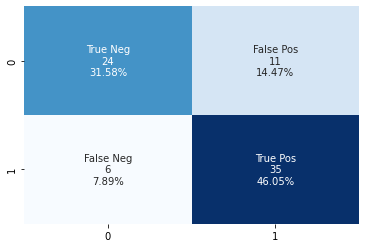

In [124]:
# Create a confusion Matrix
matrix = confusion_matrix(y_test, predictions)

# Create
confusion_matrix_labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

def create_confusion_matrix(conf_matrix, label_names):
	value_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
	value_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
	matrix_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(label_names,value_counts,value_percentages)]
	heatmap_labels = np.asarray(matrix_labels).reshape(2,2)

	return sns.heatmap(conf_matrix, annot=heatmap_labels, fmt='', cmap='Blues', cbar=False)

# Create Heatmap Visualization
create_confusion_matrix(matrix, confusion_matrix_labels)